# Sentiment Analysis - Analysis Export

In [41]:
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_theme(style="whitegrid")
%matplotlib inline

In [42]:
skripal_df = pd.read_csv("./skripal_export.csv")
iranian_df = pd.read_csv("./scientist_assassination.csv")
df = pd.concat([skripal_df, iranian_df])
# df = df.dropna(axis=1, how='all')
df = df[['fullText', 'Dataset', 'Author', "People", "Subject", "Title", "Pages", "Publication date"]]
df = df.dropna()
df = df.reset_index(drop = True)
df = df.drop([49])
df = df.reset_index(drop = True)
df = df[df.fullText != "Error encountered in scraping fullText."]
df['Page'] = df['Pages'].apply(lambda x: list(map(int, re.findall(r'\d+', x)))[0])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 131
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fullText          110 non-null    object
 1   Dataset           110 non-null    object
 2   Author            110 non-null    object
 3   People            110 non-null    object
 4   Subject           110 non-null    object
 5   Title             110 non-null    object
 6   Pages             110 non-null    object
 7   Publication date  110 non-null    object
 8   Page              110 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 8.6+ KB


In [44]:
df.Dataset.value_counts()

Skripal                    103
Scientist Assassination      7
Name: Dataset, dtype: int64

In [45]:
p = r'\w+'
df['wordCount'] = df['fullText'].apply(lambda x: len(re.findall(p, x)))

In [46]:
df['PubDateParsed'] =  pd.to_datetime(df['Publication date'])
df = df.sort_values(by=['PubDateParsed'])
df.head()

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed
124,Russia's intelligence service said Friday that...,Skripal,Steven Lee Myers; Alan Cowell contributed repo...,"Litvinenko, Alexander; Lugovoy, Andrei K",Espionage;Criminal investigations;Poisoning,Russia Says It Opened Criminal Inquiry Into Br...,A.4,16-Jun-07,4,624,2007-06-16
131,President Bush deflected a secret request by I...,Scientist Assassination,"Sanger, David E","Bush, George W",Covert operations;Nuclear weapons;Military air...,U.S. Rejected Aid For Israeli Raid On Nuclear ...,A.1,11-Jan-09,1,2571,2009-01-11
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"Zaporozhsky, Aleksandr; Skripal, Sergei V; Vas...",Prisoner transfers;Espionage,Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10
123,WASHINGTON -- On a Friday afternoon in mid-Ju...,Skripal,"PETER BAKER, CHARLIE SAVAGE and BENJAMIN WEISER","Obama, Barack",Arrests;Prisoner transfers;International relat...,Swap Idea Emerged Early In Case of Russian Age...,A.1,10-Jul-10,1,1681,2010-07-10
130,TEHRAN -- Unidentified assailants riding motor...,Scientist Assassination,WILLIAM YONG and ROBERT F. WORTH,"Ahmadinejad, Mahmoud",Nuclear weapons;Sanctions;Assassinations & ass...,Bombings Hit Atomic Experts In Iran Streets: [...,A.1,30-Nov-10,1,1032,2010-11-30


## Sentiment

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [48]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [49]:
df['negSentiment'] = df['fullText'].apply(lambda x: sentiment_analyzer_scores(x)['neg'])
df['posSentiment'] = df['fullText'].apply(lambda x: sentiment_analyzer_scores(x)['pos'])

In [50]:
# normalize
min_max_scaler = preprocessing.MinMaxScaler()
df['negSentimentScaled'] = df['negSentiment'].apply(lambda x: x/df['negSentiment'].max())
df['posSentimentScaled'] = df['posSentiment'].apply(lambda x: x/df['posSentiment'].max())

In [51]:
df.head()

,fullText,Dataset,Author,People,Subject,Title,Pages,Publication date,Page,wordCount,PubDateParsed,negSentiment,posSentiment,negSentimentScaled,posSentimentScaled
124,Russia's intelligence service said Friday that...,Skripal,Steven Lee Myers; Alan Cowell contributed repo...,"Litvinenko, Alexander; Lugovoy, Andrei K",Espionage;Criminal investigations;Poisoning,Russia Says It Opened Criminal Inquiry Into Br...,A.4,16-Jun-07,4,624,2007-06-16,0.110,0.058,0.561224,0.436090
131,President Bush deflected a secret request by I...,Scientist Assassination,"Sanger, David E","Bush, George W",Covert operations;Nuclear weapons;Military air...,U.S. Rejected Aid For Israeli Raid On Nuclear ...,A.1,11-Jan-09,1,2571,2009-01-11,0.107,0.091,0.545918,0.684211
122,"WASHINGTON -- When Aleksandr Zaporozhsky, one ...",Skripal,SCOTT SHANE and ELLEN BARRY,"Zaporozhsky, Aleksandr; Skripal, Sergei V; Vas...",Prisoner transfers;Espionage,Intrigue and Ambiguity in Cases of 4 Russians ...,A.9,10-Jul-10,9,1158,2010-07-10,0.089,0.122,0.454082,0.917293
123,WASHINGTON -- On a Friday afternoon in mid-Ju...,Skripal,"PETER BAKER, CHARLIE SAVAGE and BENJAMIN WEISER","Obama, Barack",Arrests;Prisoner transfers;International relat...,Swap Idea Emerged Early In Case of Russian Age...,A.1,10-Jul-10,1,1681,2010-07-10,0.086,0.102,0.438776,0.766917
130,TEHRAN -- Unidentified assailants riding motor...,Scientist Assassination,WILLIAM YONG and ROBERT F. WORTH,"Ahmadinejad, Mahmoud",Nuclear weapons;Sanctions;Assassinations & ass...,Bombings Hit Atomic Experts In Iran Streets: [...,A.1,30-Nov-10,1,1032,2010-11-30,0.147,0.075,0.750000,0.563910


<ipython-input-53-78e982b1c77b>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Positive and Negative Sentiment - NYT", fontSize = 16)


Text(21.296589988425936, 0.5, 'Negative Sentiment')

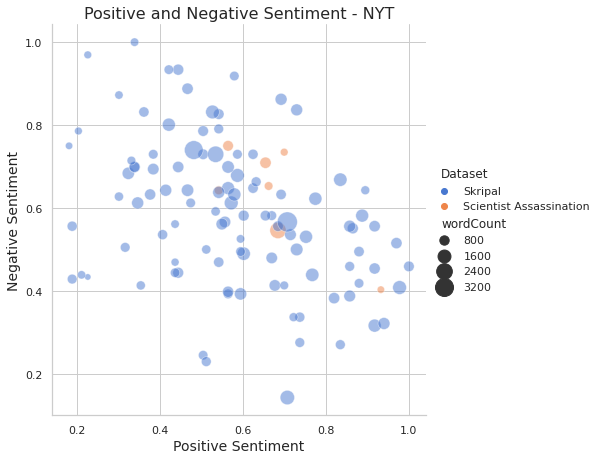

In [53]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="posSentimentScaled", y="negSentimentScaled", hue="Dataset", size="wordCount",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.title("Positive and Negative Sentiment - NYT", fontSize = 16)
plt.xlabel("Positive Sentiment", fontsize = 14)
plt.ylabel("Negative Sentiment", fontsize = 14)

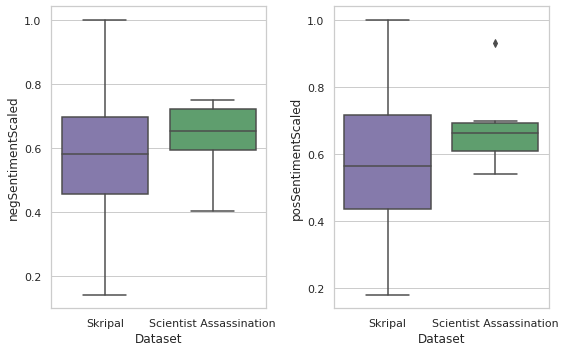

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (8,5))

sns.boxplot(x="Dataset", y="negSentimentScaled", palette=["m", "g"],
            data=df, ax = ax[0])
sns.boxplot(x="Dataset", y="posSentimentScaled", palette=["m", "g"],
            data=df, ax = ax[1])

plt.tight_layout()

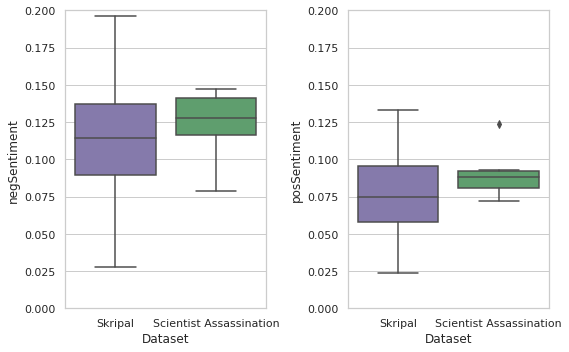

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (8,5))

sns.boxplot(x="Dataset", y="negSentiment", palette=["m", "g"],
            data=df, ax = ax[0])
sns.boxplot(x="Dataset", y="posSentiment", palette=["m", "g"],
            data=df, ax = ax[1])

ax[0].set_ylim(0,0.2)
ax[1].set_ylim(0,0.2)

plt.tight_layout()

Text(0, 0.5, 'Negative sentiment')

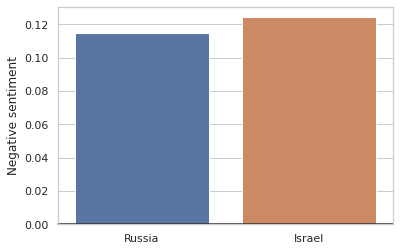

In [63]:
sns.barplot(x=['Russia', 'Israel'], y=[df[df['Dataset'] == "Skripal"]['negSentiment'].mean(), df[df['Dataset'] == "Scientist Assassination"]['negSentiment'].mean()], palette="deep")
plt.axhline(0, color="k", clip_on=False)
plt.ylabel("Negative sentiment")

Text(0, 0.5, 'Positive sentiment')

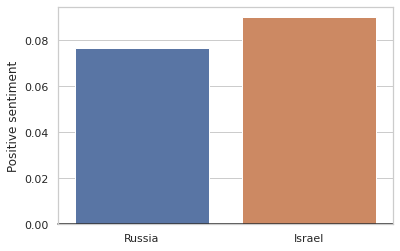

In [62]:
sns.barplot(x=['Russia', 'Israel'], y=[df[df['Dataset'] == "Skripal"]['posSentiment'].mean(), df[df['Dataset'] == "Scientist Assassination"]['posSentiment'].mean()], palette="deep")
plt.axhline(0, color="k", clip_on=False)
plt.ylabel("Positive sentiment")